<a href="https://colab.research.google.com/github/paulodreher/data_science/blob/main/Plotando%20audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import math
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#carregar um sinal de exemplo
x, sr = librosa.load('sample.wav')
print(sr)
print(x.shape)

22050
(49613,)


In [ ]:
#duração do sinal (segundos)
librosa.get_duration(x, sr)

2.2500226757369615

In [ ]:
#Escutar o áudio
ipd.Audio(x, rate=sr)

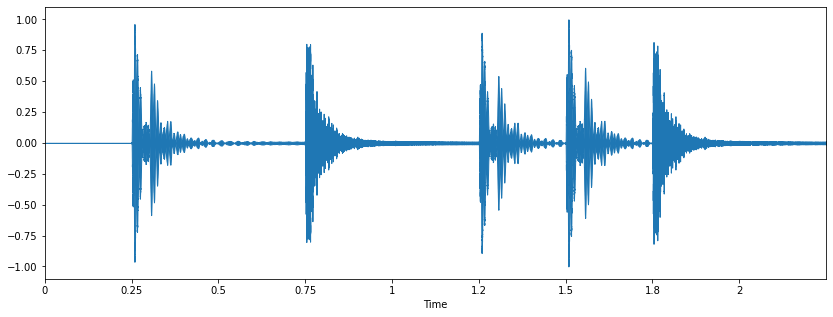

In [ ]:
#Visualizar o sinal de áudio
plt.rcParams['figure.figsize'] = (14, 5)
librosa.display.waveplot(x, sr=sr)

In [ ]:
hop_length = 256
frame_length = 512

#rmse
n=0
tam = int((len(x)/hop_length)+1)
rmse = numpy.empty(tam)
for i in range(0, len(x), hop_length):
    rmse[n] = math.sqrt((sum(abs(x[i:i+frame_length]**2)))/tam)
    n=n+1

rmse.shape

(194,)

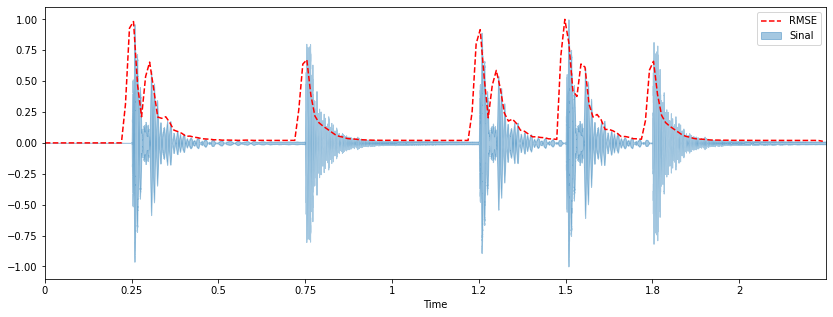

In [ ]:
frames = range(len(rmse))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t[:len(rmse)], rmse/rmse.max(), 'r--')
plt.legend(('RMSE', 'Sinal'))